# Simulation des mouvements de taux en utilisant la méthode de Monte Carlo et le Model CIR (Cox Ingersoll Ross)

### J'utilise l'équation ci-contre: $dr_{t}=a(b-r_{t})\,dt+\sigma {\sqrt  {r_{t}}}\,dW_{t}$
#### où b est la moyenne des taux à long terme, a l'accéleration (en retour) vers b, $\sigma$ la volatilité et $dW_{t}$ les shocks

### Pour convertir un taux annuel à une durée plus réduite: $r_{instant}=\exp(r_{annual})-1$
### Pour convertir un taux en annuel: $r_{annual}=\log(r_{instant})+1$

In [13]:
import numpy as np
import pandas as pd

def instant_to_annual(r):
    return np.expm1(r)

def annual_to_instant(r):
    return np.log1p(r)

def cir_model(a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_init=0.03, nb_years = 15, nb_scenarios=15):
    r_init = annual_to_instant(r_init) # on initie le prmier taux
    dt = 1/steps_per_year # on définit le nombre de période par an
    total_nb_steps = int(nb_years*steps_per_year) # on déterminer le nombre total des periodes
    
    shock = np.random.normal(0, scale=np.sqrt(dt), size=(total_nb_steps, nb_scenarios)) # on genere les shocks
    
    rates = np.empty_like(shock) # veut dire un tableau vide ayant les mêmes dimensions que shock
    rates[0] = r_init # initialisation
    for step in range(1, total_nb_steps):
        r_t = rates[step-1] # valeur précédente
        d_r_t = a*(b-r_t)*dt + sigma*np.sqrt(r_t)*shock[step] # l'approche par simulation 
        rates[step] = abs(r_t + d_r_t) # valeur actuelle 
        
    return pd.DataFrame(data=instant_to_annual(rates), index=range(total_nb_steps))

## Lancer la simulation
### dans cette exemple je garde les valeurs par defaut en parametre de la fonction à l'exception le nombre de senarios. Bien entendu, il est possible de modifier les autres paramètres, exemple le nombre d'année, la volatilité...etc 

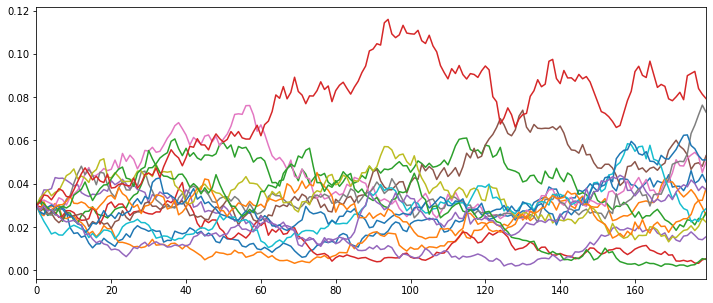

In [15]:
cir_model(nb_scenarios=20).plot(legend=False, figsize=(12,5))

### si l'affichage ne fonctionne pas, utiliser la commande: %matplotlib inline